

### Project Overview:  Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.





<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Python libraries contain previously combined set of codes that can be iteratively used, hence reducing time. As the term  suggests it’s similar to the physical library that holds reusable resources. However, in this instance it holds reusable lines of code that can be used in other programmes. In this project we used numpy, pandas, matplotlib, seaborn and sklearn libraries  for the purposes of data loading, manipulation, visualisation, preparation and model building.
__1. Numpy:__
Aids in mathematical ,numerical calculations and computations. It used in scientific, engineering, and data science programming. And is the most essential library for performing mathematical and statistical operations.
__2. Pandas:__
Provides us with vast facilities for data munipulation and analysis.
__3. Matplotlib and seaborn:__
These are both data visualisation libraries which provide functions to plot various data sets.
__4. sklearn:__
Is a software machine learning library which provides various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN. It is also designed to interoperate with numerical and scientific libraries such as, NumPy and SciPy|

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Two main datasets will be used in this project.
  **1. df_train_cvs loaded as df**
  This dataframe will be used to train our model.
  **2. df_test_cvs loaded as test_df**
  test_df Will be used as our test data to assess the accurary of our model.|

---

In [3]:
df = pd.read_csv('df_train.csv',index_col=0)
test_df = pd.read_csv('df_test.csv', index_col = 0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, to gain a better understanding of the data, a basic analysis of the dataframe was done to get an overview of the contents in the table. Moreover, various statistical analysis methods and visualiations  we performed to gauge two main things. firstly, the relationship between the target variable(load_shortfall_3h) and the independent variables. Secondly, the relationship between the independent variables themselves. This analysis will aid us in determining which independant variables are relevant and weather or not we should remove or engineer new variables. |

---


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,,,,
CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


# Checking the df datatypes

In [ ]:

df.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

**From the above output we see that the time, Valencia_wind_deg and Seville_pressure columns have object datatypes.
The time column should be changed to datetime dtype, and we are going to further investigate the contents of Valencia_wind_deg
and Seville_pressure.**

In [ ]:
df[['Valencia_wind_deg','Seville_pressure']]

,Valencia_wind_deg,Seville_pressure
0,level_5,sp25
1,level_10,sp25
2,level_9,sp25
3,level_8,sp25
4,level_7,sp25
...,...,...
8758,level_6,sp23
8759,level_6,sp23
8760,level_9,sp22
8761,level_8,sp23


# Checking the the df for null values

In [ ]:

df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

**The above output shows us that the Valencia_pressure column has 2068 null values, which is roughly 24% of the data in
the column. Since, the percentage of missing values is below the threshold of 30% we will opt to fill in the data instead of removing the entire column.**

In [ ]:
#Look at the number summaries to try gather insight of the data
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


#Five number summary for 'Bilbao_pressure'

In [5]:
data = df['Bilbao_pressure']

# Calculate minimum
minimum = np.min(data)

# Calculate first quartile (25th percentile)
first_quartile = np.percentile(data, 25)

# Calculate median (50th percentile)
median = np.percentile(data, 50)

# Calculate third quartile (75th percentile)
third_quartile = np.percentile(data, 75)

# Calculate maximum
maximum = np.max(data)

# Print the five-number summary
print("Minimum:", minimum)
print("First Quartile:", first_quartile)
print("Median:", median)
print("Third Quartile:", third_quartile)
print("Maximum:", maximum)


Minimum: 971.3333333333
First Quartile: 1013.0
Median: 1019.0
Third Quartile: 1024.0
Maximum: 1042.0


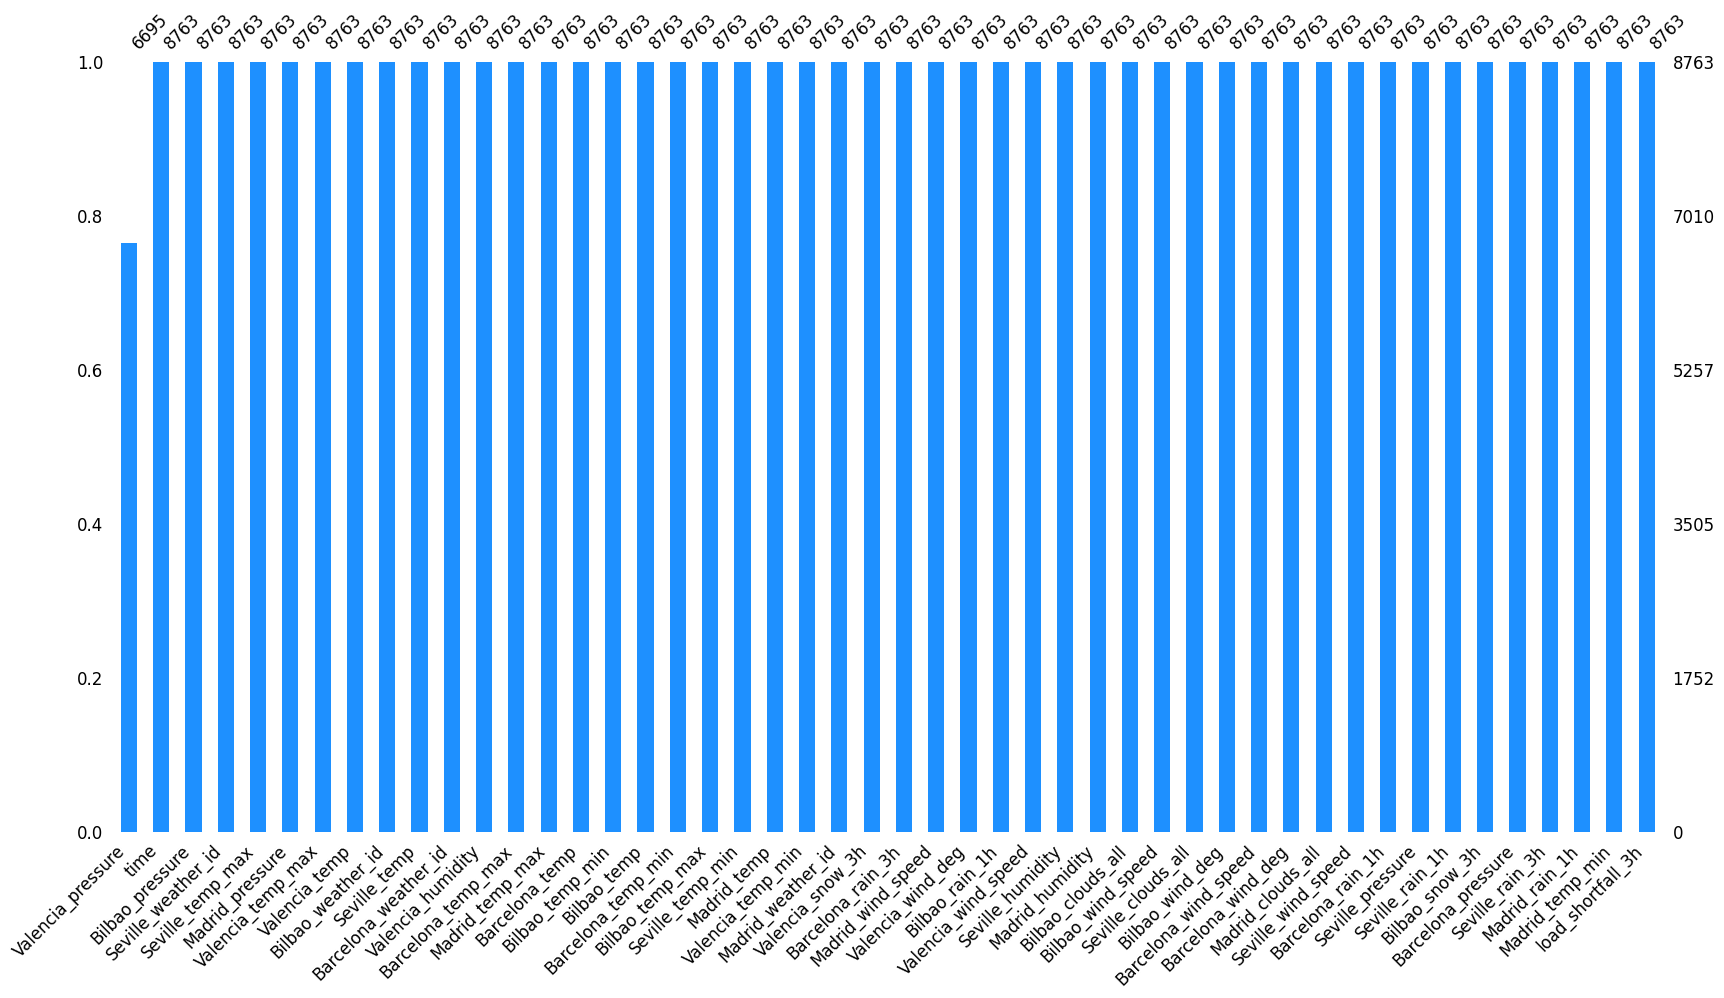

In [ ]:

msno.bar(df, color="dodgerblue", sort="ascending", figsize=(20,10), fontsize=12);

#The graph above shows the missing distribution of the features,by far it seems like our data is accurate in the sense that there are no missing values

In [ ]:
import pandas as pd
import numpy as np
df1=df['Bilbao_pressure']
# Assuming df is your dataframe with the specified columns

# Calculate sum for each column
sum_values = df1.sum()

# Define weights for weighted mean calculation
weights = np.arange(len(df1)) + 1  # Array with values 1, 2, 3, ..., len(df)

# Calculate weighted mean for each column


# Calculate kurtosis for each column
kurtosis_values = df1.kurtosis()

# Calculate sample variance for each column
sample_variance = df1.var()

# Calculate mode for each column
mode_values = df1.mode().iloc[0]  # Get the first mode if multiple modes exist

# Calculate coefficient of mean for each column
coefficient_of_mean = (df1.std() / df1.mean()) * 100  # Convert to percentage

# Display the results
print("Sum:\n", sum_values)

print("\nKurtosis:\n", kurtosis_values)
print("\nSample Variance:\n", sample_variance)
print("\nMode:\n", mode_values)
print("\nCoefficient of Mean:\n", coefficient_of_mean)


Sum:
 8918451.66666666

Kurtosis:
 1.8253225485015836

Sample Variance:
 100.92460591377123

Mode:
 1023.0

Coefficient of Mean:
 0.9871016544568761


# Measures of Location (Central Tendency)

In [ ]:
location_measures = df.describe().loc[['mean', '50%', '25%', '75%', 'count']]
# 'mean' gives the mean of each column
# '50%' gives the median (50th percentile) of each column
# '25%' gives the 25th percentile (first quartile) of each column
# '75%' gives the 75th percentile (third quartile) of each column
# 'count' gives the count of non-null values in each column


print("Measures of Location (Central Tendency):")
print(location_measures)




Measures of Location (Central Tendency):
       Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
mean            2.425729        0.135753             2.586272   
50%             2.000000        0.000000             1.666667   
25%             1.000000        0.000000             1.000000   
75%             3.333333        0.100000             3.666667   
count        8763.000000     8763.000000          8763.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
mean          62.658793        57.414717          43.469132   
50%           65.666667        58.000000          45.000000   
25%           44.333333        36.333333          10.000000   
75%           82.000000        78.666667          75.000000   
count       8763.000000      8763.000000        8763.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
mean            1.850356           13.714748       158.957511   
50%             1.000000            0.000000       147.0000

# Measures of Variability (Dispersion)

In [ ]:

variability_measures = df.describe().loc[['std', 'min', 'max']]
# 'std' gives the standard deviation of each column
# 'min' gives the minimum value of each column
# 'max' gives the maximum value of each column

print("\nMeasures of Variability (Dispersion):")
print(variability_measures)



Measures of Variability (Dispersion):
     Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
std           1.850371        0.374901              2.41119         22.621226   
min           0.000000        0.000000              0.00000          8.333333   
max          13.000000        3.000000             52.00000        100.000000   

     Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
std        24.335396          32.551044           1.695888   
min         6.333333           0.000000           0.000000   
max       100.000000         100.000000          12.666667   

     Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  ...  \
std           24.272482       102.056299              1.792197  ...   
min            0.000000         0.000000              0.000000  ...   
max           97.333333       359.333333             12.666667  ...   

     Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
std         9.752047        6.52

#Inter Quartile Range

In [ ]:


# Assuming df is your dataframe with the specified columns

# Calculate the interquartile range (IQR)
iqr = df.quantile(0.75) - df.quantile(0.25)

print("Interquartile Range (IQR) for each column:")
print(iqr)


Interquartile Range (IQR) for each column:
Madrid_wind_speed          2.333333
Bilbao_rain_1h             0.100000
Valencia_wind_speed        2.666667
Seville_humidity          37.666667
Madrid_humidity           42.333333
Bilbao_clouds_all         65.000000
Bilbao_wind_speed          2.000000
Seville_clouds_all        20.000000
Bilbao_wind_deg          160.666667
Barcelona_wind_speed       2.333333
Barcelona_wind_deg       141.833333
Madrid_clouds_all         33.333333
Seville_wind_speed         2.333333
Barcelona_rain_1h          0.000000
Seville_rain_1h            0.000000
Bilbao_snow_3h             0.000000
Barcelona_pressure         8.000000
Seville_rain_3h            0.000000
Madrid_rain_1h             0.000000
Barcelona_rain_3h          0.000000
Valencia_snow_3h           0.000000
Madrid_weather_id          0.666667
Barcelona_weather_id       1.000000
Bilbao_pressure           11.000000
Seville_weather_id         0.000000
Valencia_pressure          7.666667
Seville_temp_max     

<ipython-input-8-d4fc9d348dde>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iqr = df.quantile(0.75) - df.quantile(0.25)


# Correlation
Below the correlation of the variables is observed. The idea is to get the degree of the relationships between the variables. If varaibales are closely correlated, it means we are able to predict the one varaible from the other. Importantly, correlation plays a vital role in locating the important variables on which to predict our target variable.

In [ ]:
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


# Heatmap
- A heatmap was created for us to better visualise the correlations between the variables.
- From observation we can see that there is a weak correlation between the independent features and the target feature.
- These weak correlations although significant, are not satisfactory. Hence, we want to further explore the data and see if we can engineer new features.

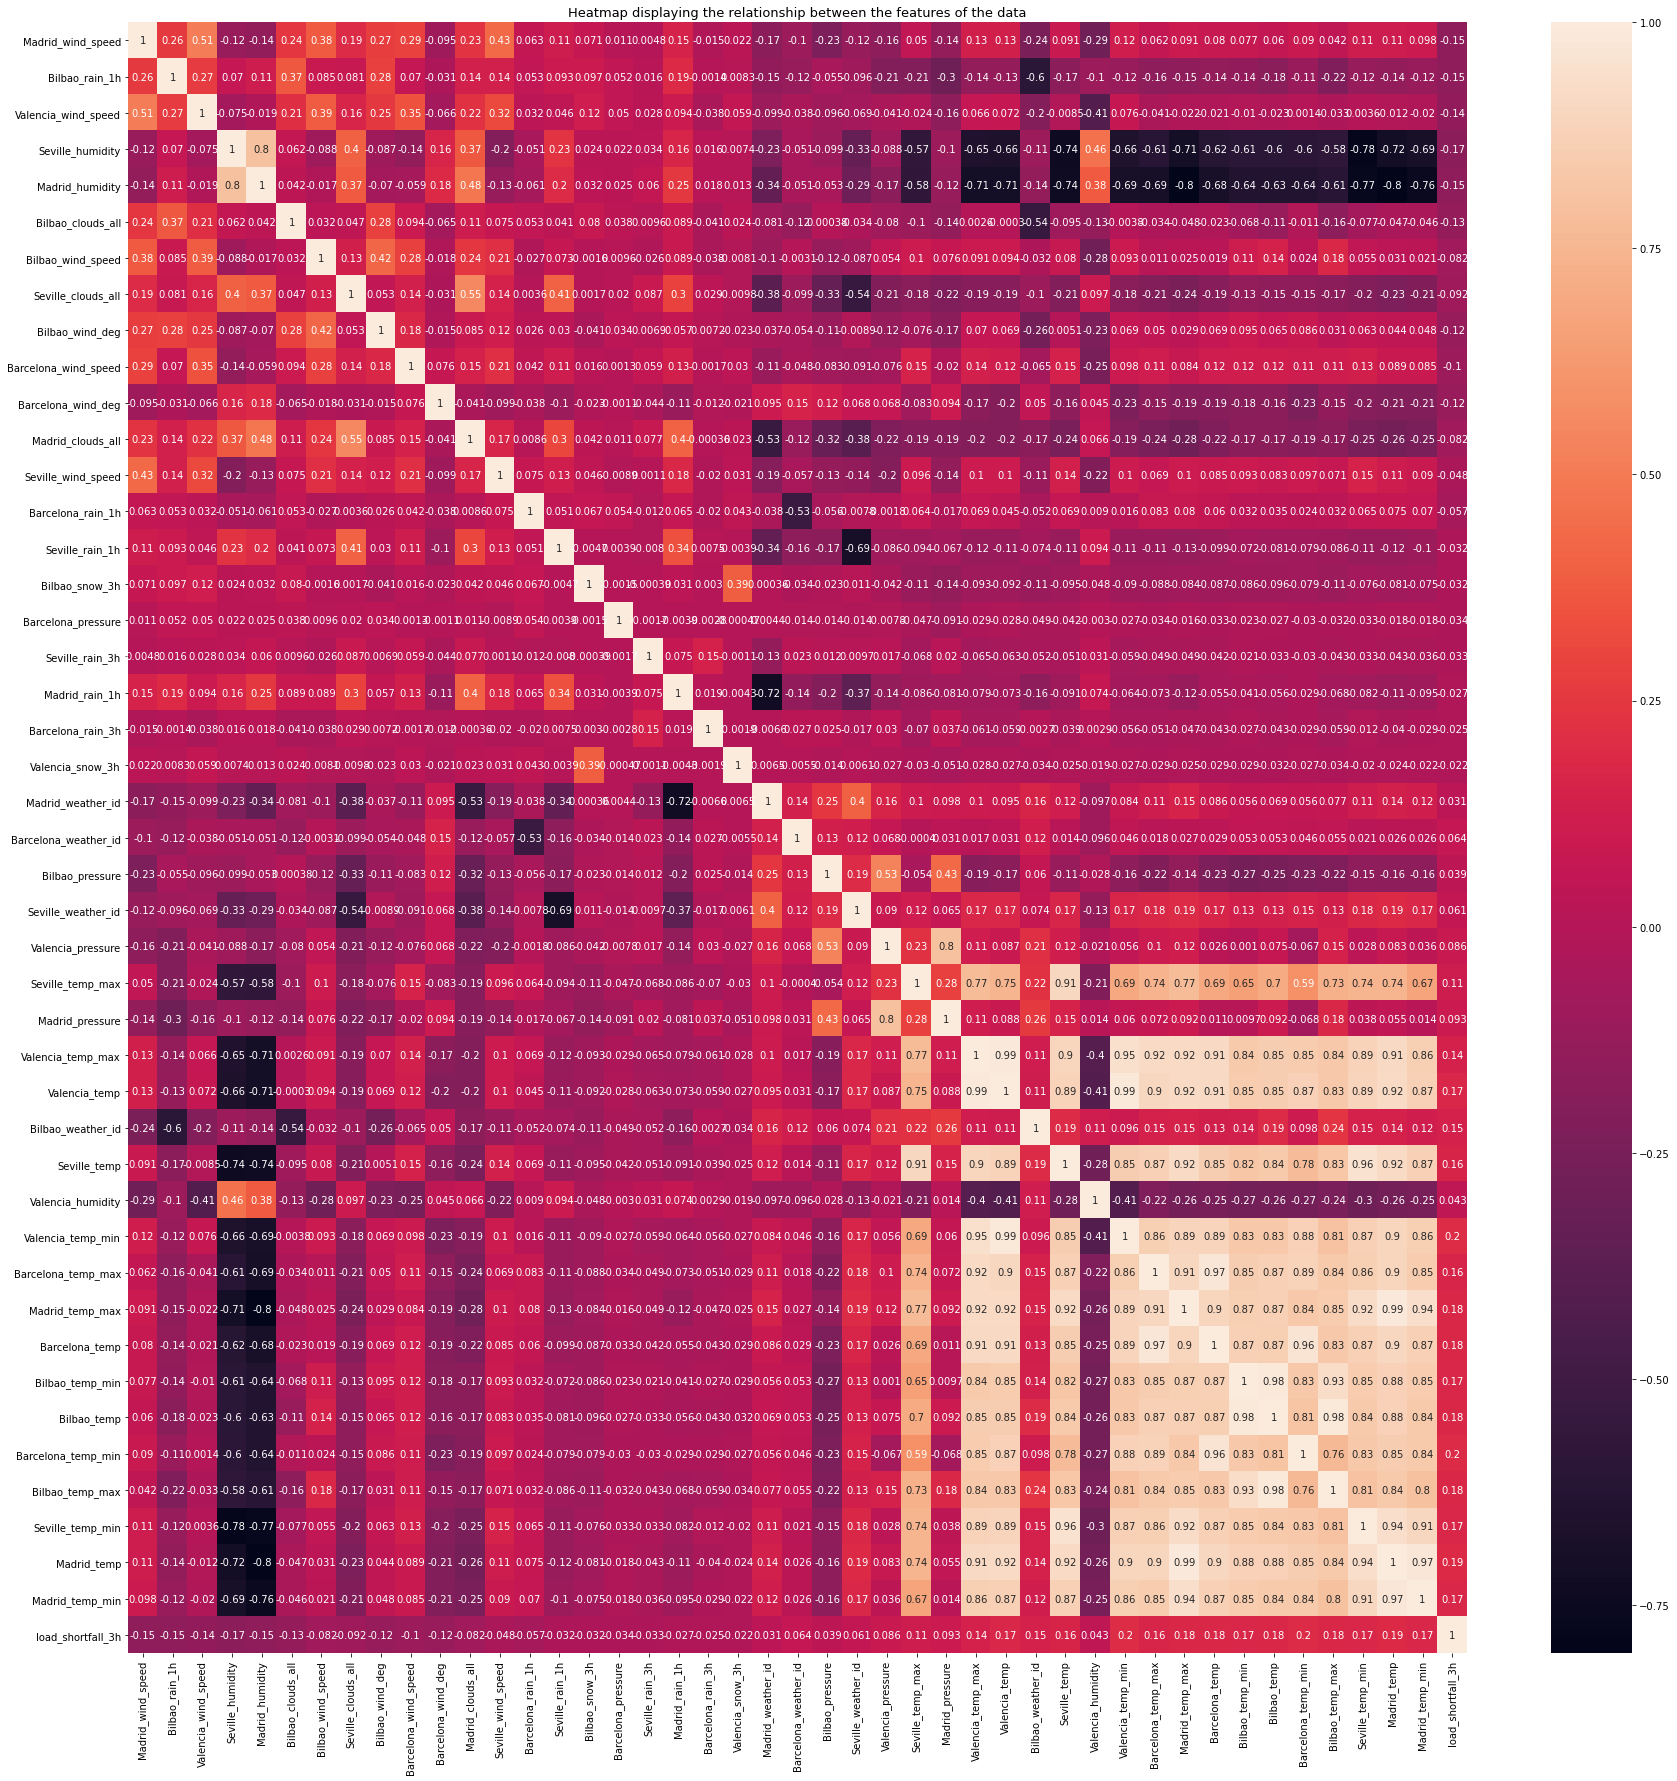

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

# Scatter Plots
Here we plotted a few scatter plots for each city, showing the respective realtionships between the weather and load shortfall.

__Madrid__

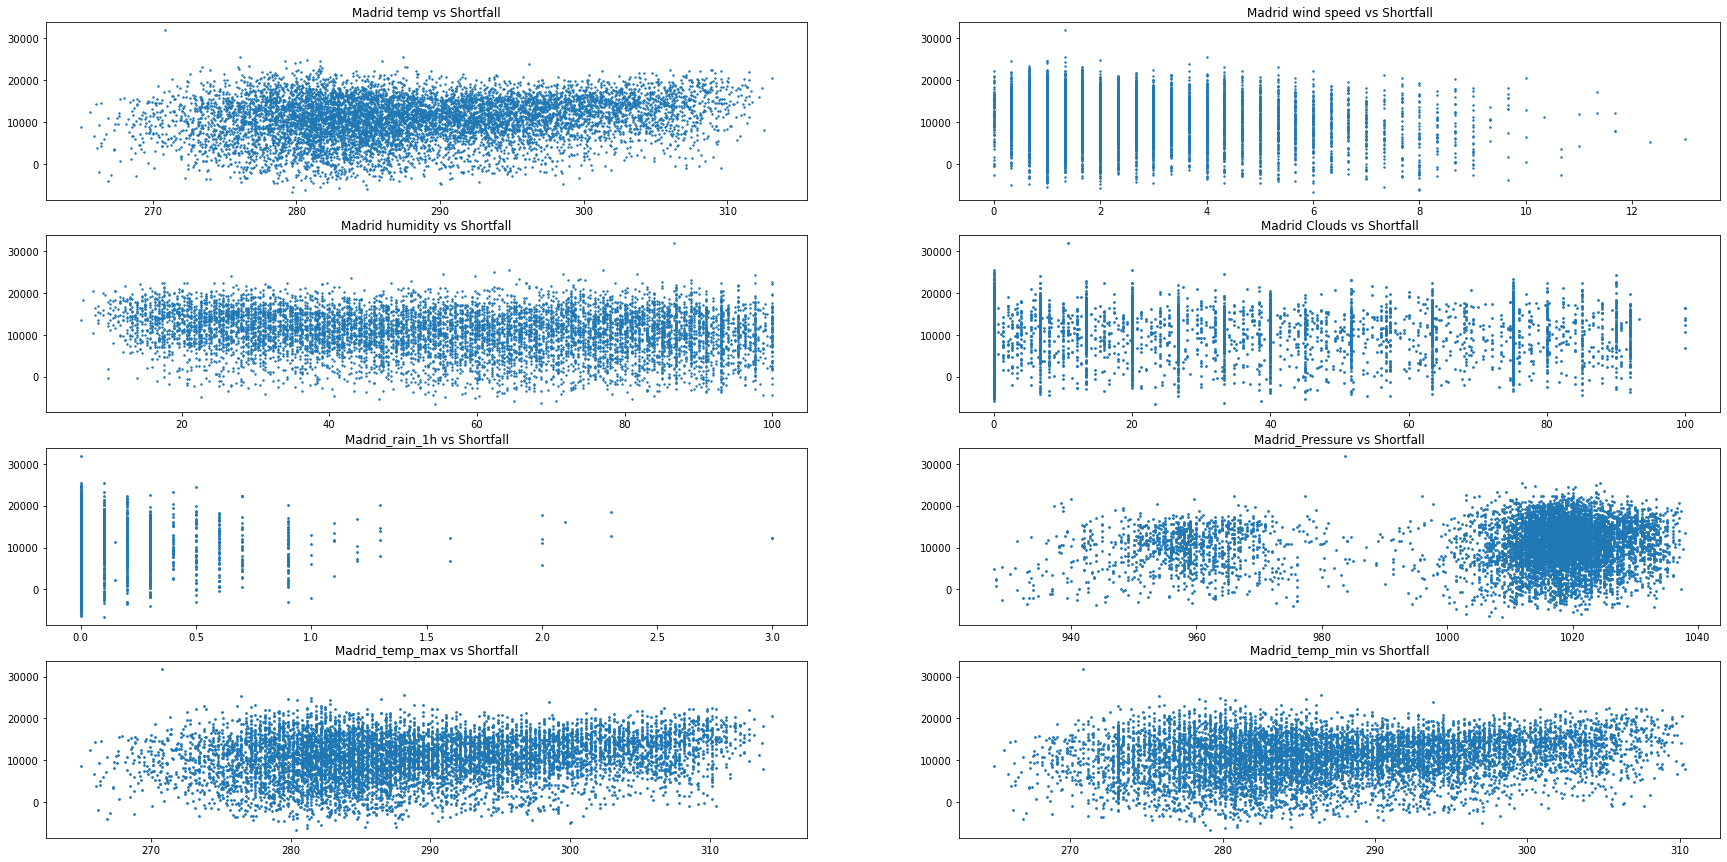

In [ ]:
y = df['load_shortfall_3h']
fig , axes = plt.subplots(4,2,figsize=(30,15))
axes[0,0].scatter(df['Madrid_temp'], y,s=2)
axes[0,0].set_title('Madrid temp vs Shortfall')
axes[0,1].scatter(df['Madrid_wind_speed'],y,s=2)
axes[0,1].set_title('Madrid wind speed vs Shortfall')
axes[1,0].scatter(df['Madrid_humidity'],y,s=2)
axes[1,0].set_title('Madrid humidity vs Shortfall')
axes[1,1].scatter(df['Madrid_clouds_all'],y,s=3)
axes[1,1].set_title('Madrid Clouds vs Shortfall')
axes[2,1].scatter(df['Madrid_pressure'],y,s=3)
axes[2,1].set_title('Madrid_Pressure vs Shortfall')
axes[2,0].scatter(df['Madrid_rain_1h'],y,s=3)
axes[2,0].set_title('Madrid_rain_1h vs Shortfall')
axes[3,0].scatter(df['Madrid_temp_max'],y, s=3)
axes[3,0].set_title('Madrid_temp_max vs Shortfall')
axes[3,1].scatter(df['Madrid_temp_min'],y, s=3)
axes[3,1].set_title('Madrid_temp_min vs Shortfall')
plt.show()

__Valencia__

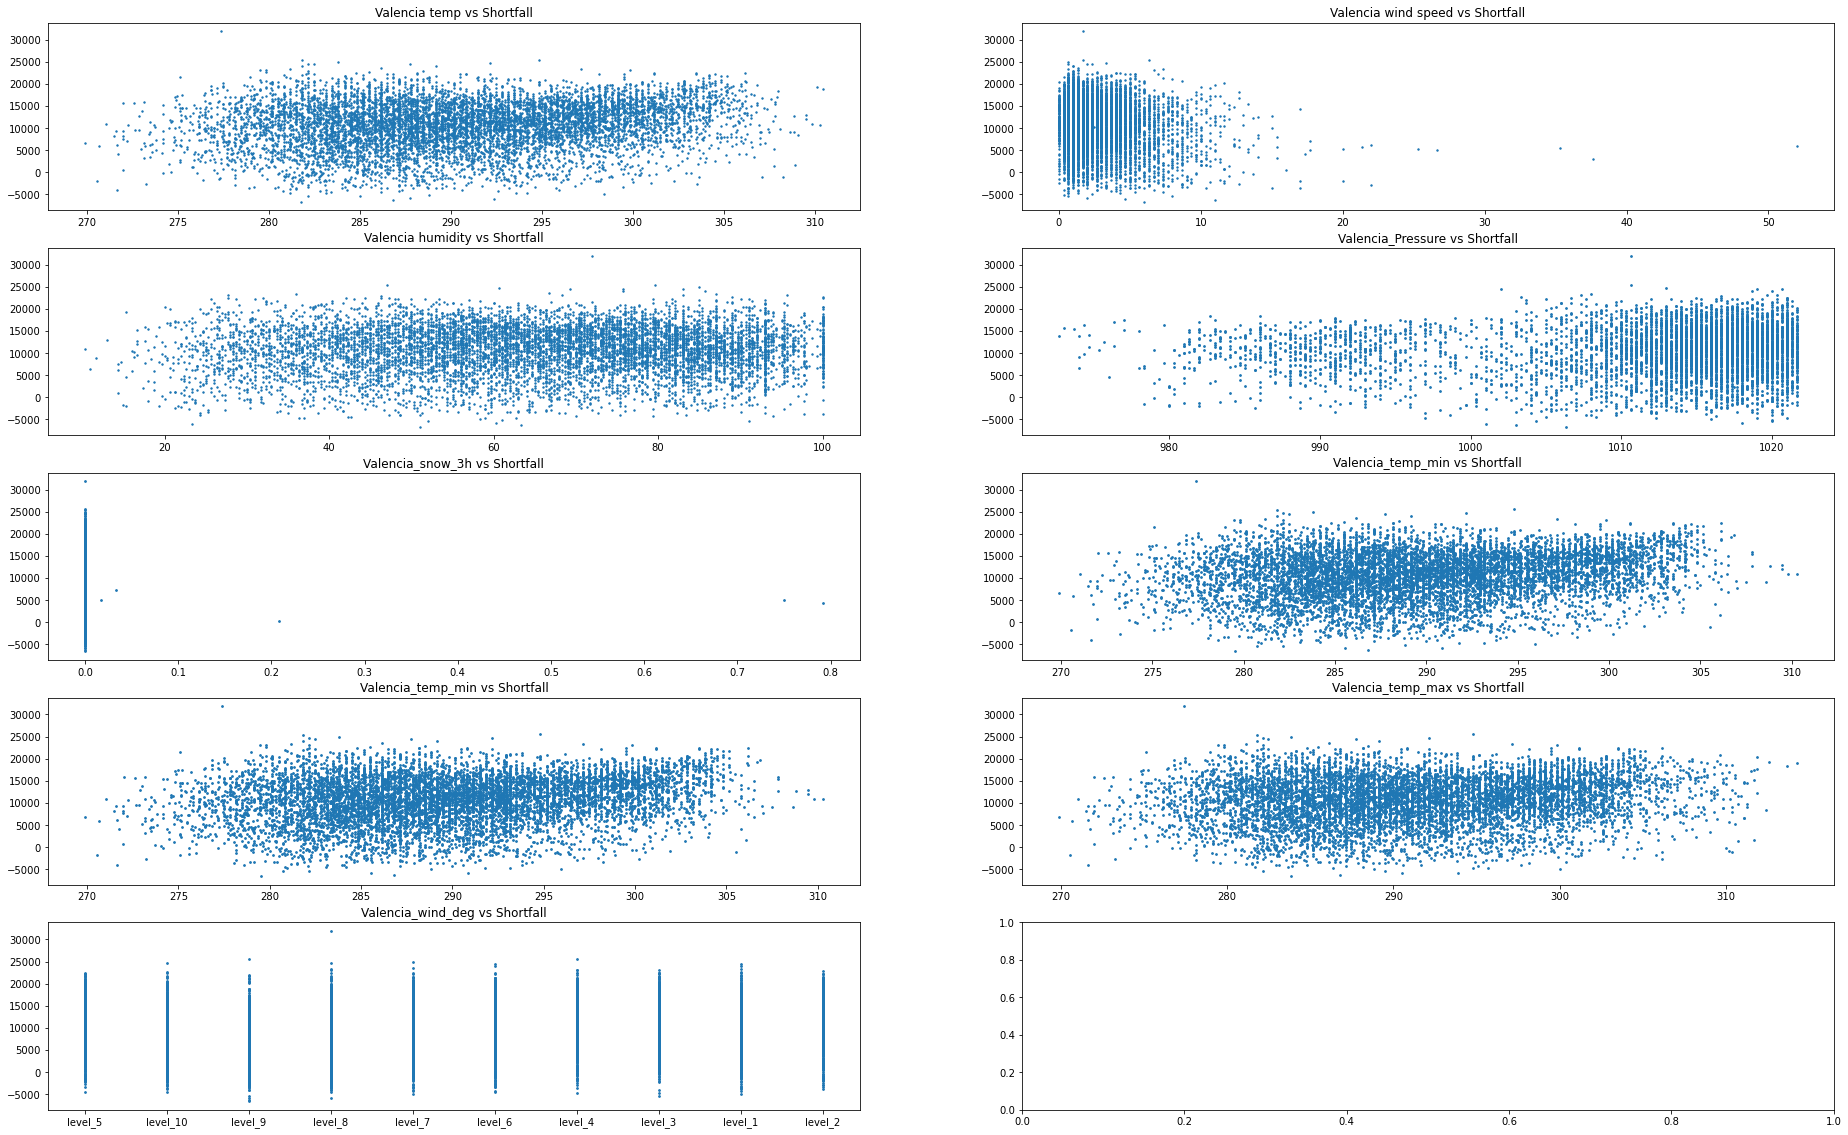

In [ ]:
y = df['load_shortfall_3h']
fig , axes = plt.subplots(5,2,figsize=(32,20))
axes[0,0].scatter(df['Valencia_temp'], y,s=2)
axes[0,0].set_title('Valencia temp vs Shortfall')
axes[0,1].scatter(df['Valencia_wind_speed'],y,s=2)
axes[0,1].set_title('Valencia wind speed vs Shortfall')
axes[1,0].scatter(df['Valencia_humidity'],y,s=2)
axes[1,0].set_title('Valencia humidity vs Shortfall')
axes[1,1].scatter(df['Valencia_pressure'],y,s=3)
axes[1,1].set_title('Valencia_Pressure vs Shortfall')
axes[2,0].scatter(df['Valencia_snow_3h'],y,s=3)
axes[2,0].set_title('Valencia_snow_3h vs Shortfall')
axes[2,1].scatter(df['Valencia_temp_min'],y,s=3)
axes[2,1].set_title('Valencia_temp_min vs Shortfall')
axes[3,0].scatter(df['Valencia_temp_min'],y,s=3)
axes[3,0].set_title('Valencia_temp_min vs Shortfall')
axes[3,1].scatter(df['Valencia_temp_max'],y,s=3)
axes[3,1].set_title('Valencia_temp_max vs Shortfall')
axes[4,0].scatter(df['Valencia_wind_deg'],y,s=3)
axes[4,0].set_title('Valencia_wind_deg vs Shortfall')
plt.show()

__Seville__

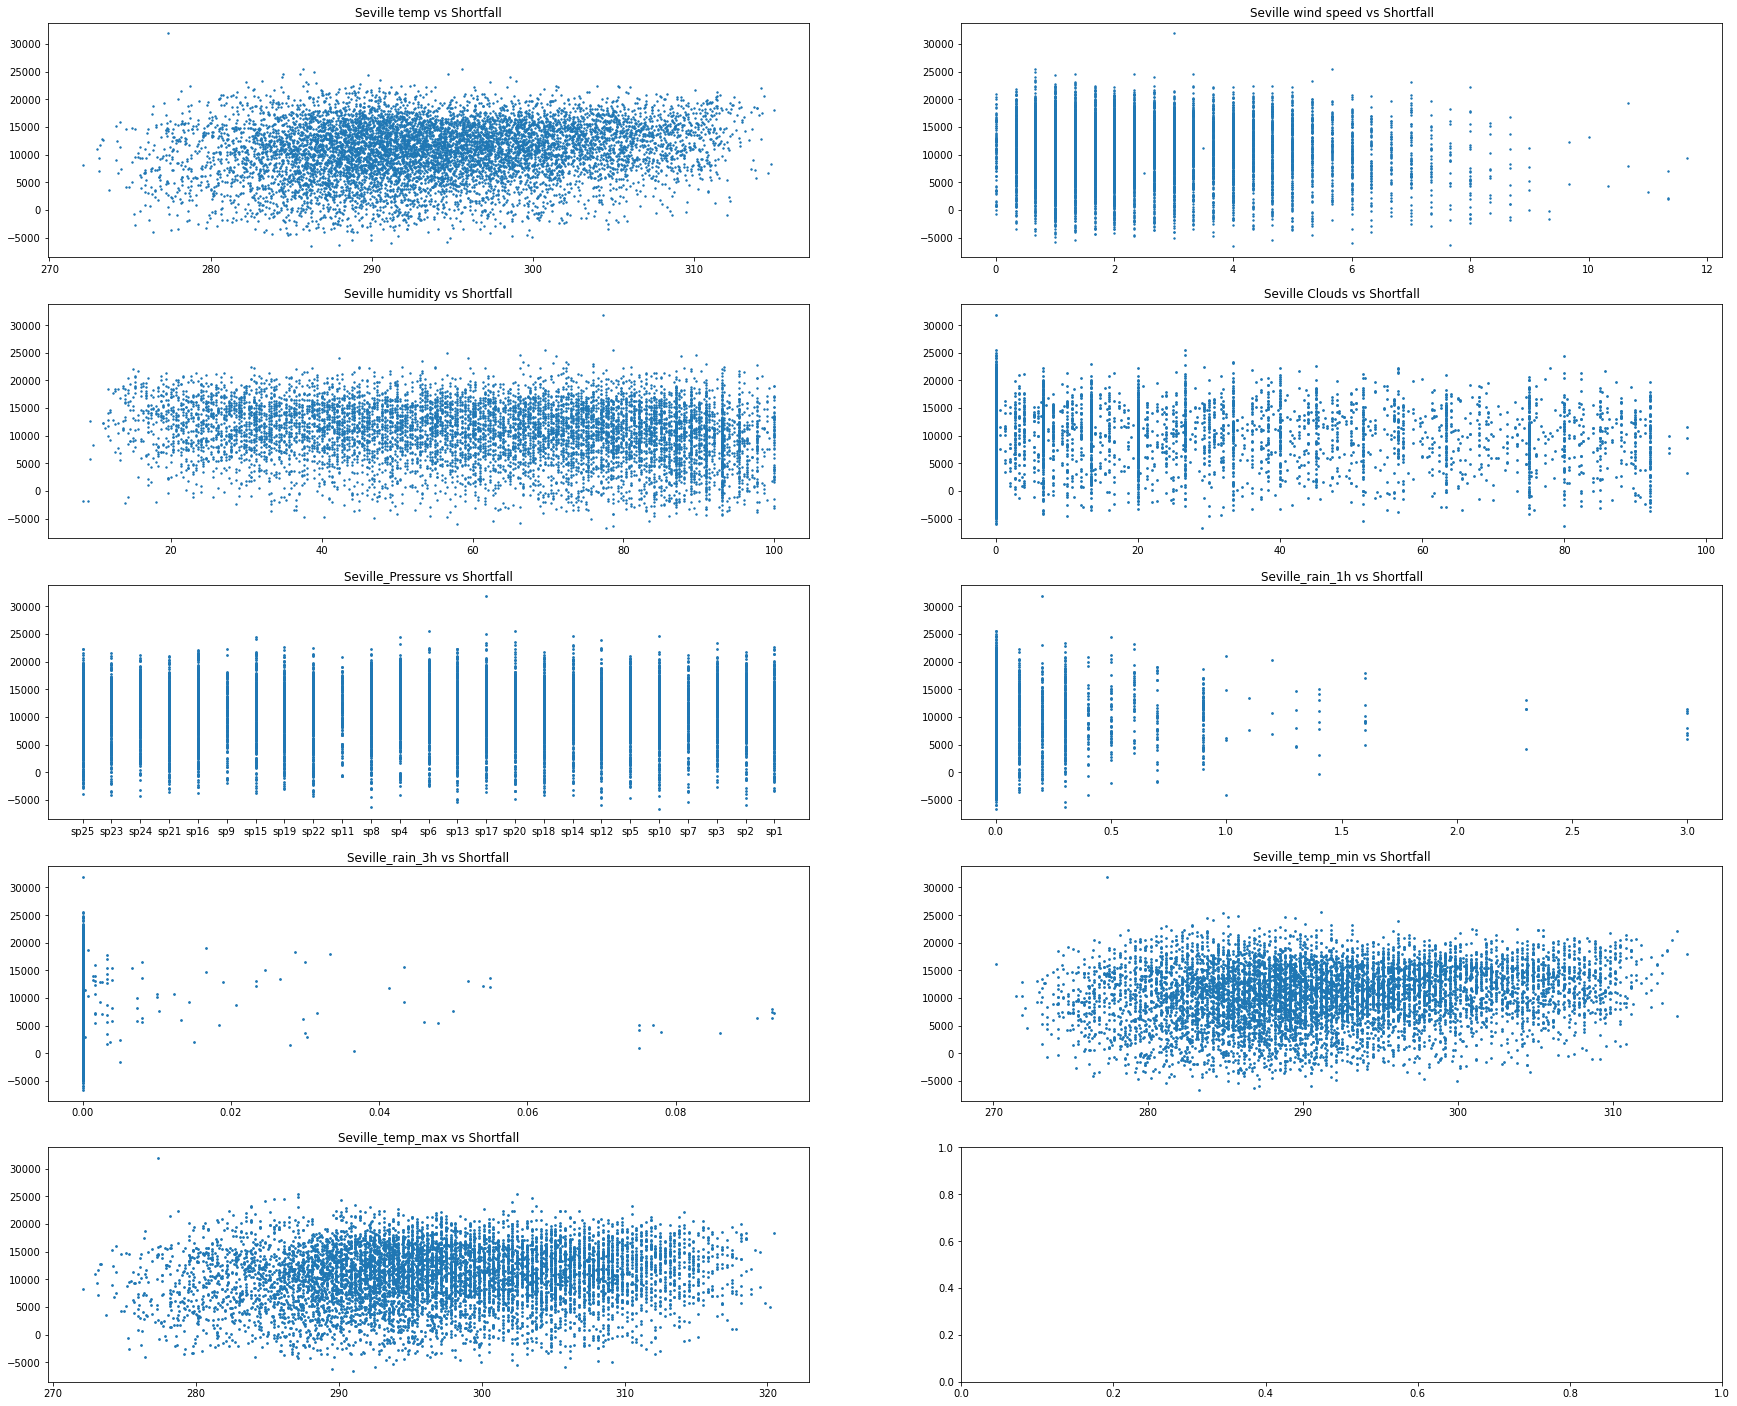

In [ ]:
y = df['load_shortfall_3h']
fig , axes = plt.subplots(5,2,figsize=(30,25))
axes[0,0].scatter(df['Seville_temp'], y,s=2)
axes[0,0].set_title('Seville temp vs Shortfall')
axes[0,1].scatter(df['Seville_wind_speed'],y,s=2)
axes[0,1].set_title('Seville wind speed vs Shortfall')
axes[1,0].scatter(df['Seville_humidity'],y,s=2)
axes[1,0].set_title('Seville humidity vs Shortfall')
axes[1,1].scatter(df['Seville_clouds_all'],y,s=3)
axes[1,1].set_title('Seville Clouds vs Shortfall')
axes[2,0].scatter(df['Seville_pressure'],y,s=3)
axes[2,0].set_title('Seville_Pressure vs Shortfall')
axes[2,1].scatter(df['Seville_rain_1h'],y,s=3)
axes[2,1].set_title('Seville_rain_1h vs Shortfall')
axes[3,0].scatter(df['Seville_rain_3h'],y,s=3)
axes[3,0].set_title('Seville_rain_3h vs Shortfall')
axes[3,1].scatter(df['Seville_temp_min'],y,s=3)
axes[3,1].set_title('Seville_temp_min vs Shortfall')
axes[4,0].scatter(df['Seville_temp_max'],y,s=3)
axes[4,0].set_title('Seville_temp_max vs Shortfall')
plt.show()

__Barcelona__

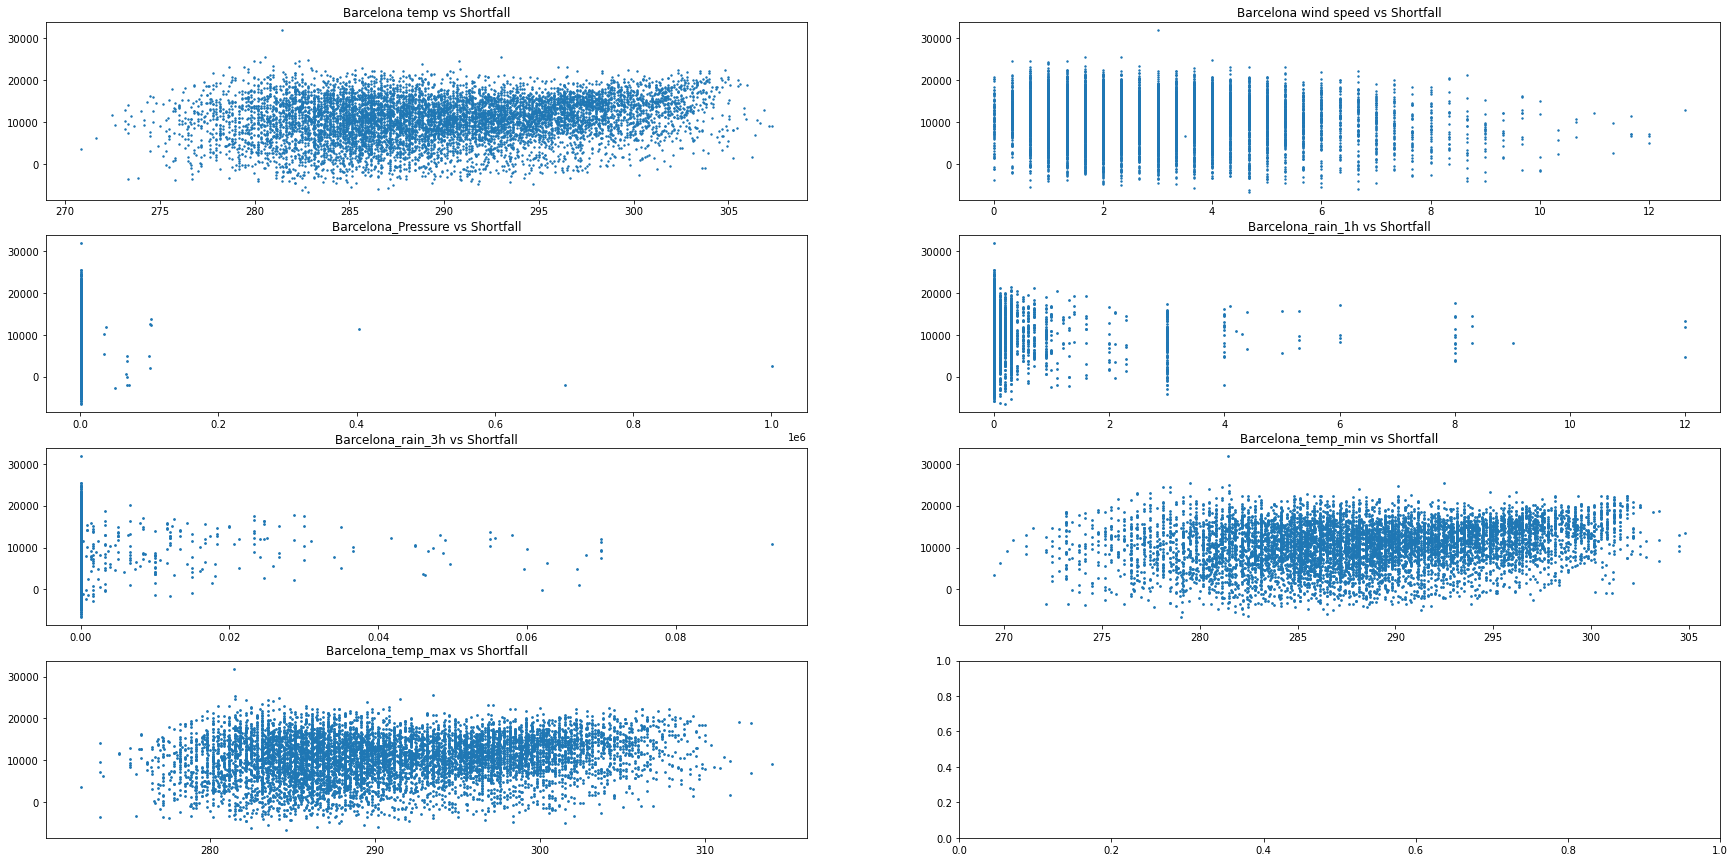

In [ ]:
y = df['load_shortfall_3h']
fig , axes = plt.subplots(4,2,figsize=(30,15))
axes[0,0].scatter(df['Barcelona_temp'], y,s=2)
axes[0,0].set_title('Barcelona temp vs Shortfall')
axes[0,1].scatter(df['Barcelona_wind_speed'],y,s=2)
axes[0,1].set_title('Barcelona wind speed vs Shortfall')
axes[1,0].scatter(df['Barcelona_pressure'],y,s=3)
axes[1,0].set_title('Barcelona_Pressure vs Shortfall')
axes[1,1].scatter(df['Barcelona_rain_1h'],y,s=3)
axes[1,1].set_title('Barcelona_rain_1h vs Shortfall')
axes[2,0].scatter(df['Barcelona_rain_3h'],y,s=3)
axes[2,0].set_title('Barcelona_rain_3h vs Shortfall')
axes[2,1].scatter(df['Barcelona_temp_min'],y,s=3)
axes[2,1].set_title('Barcelona_temp_min vs Shortfall')
axes[3,0].scatter(df['Barcelona_temp_max'],y,s=3)
axes[3,0].set_title('Barcelona_temp_max vs Shortfall')
plt.show()

**Bilbao**

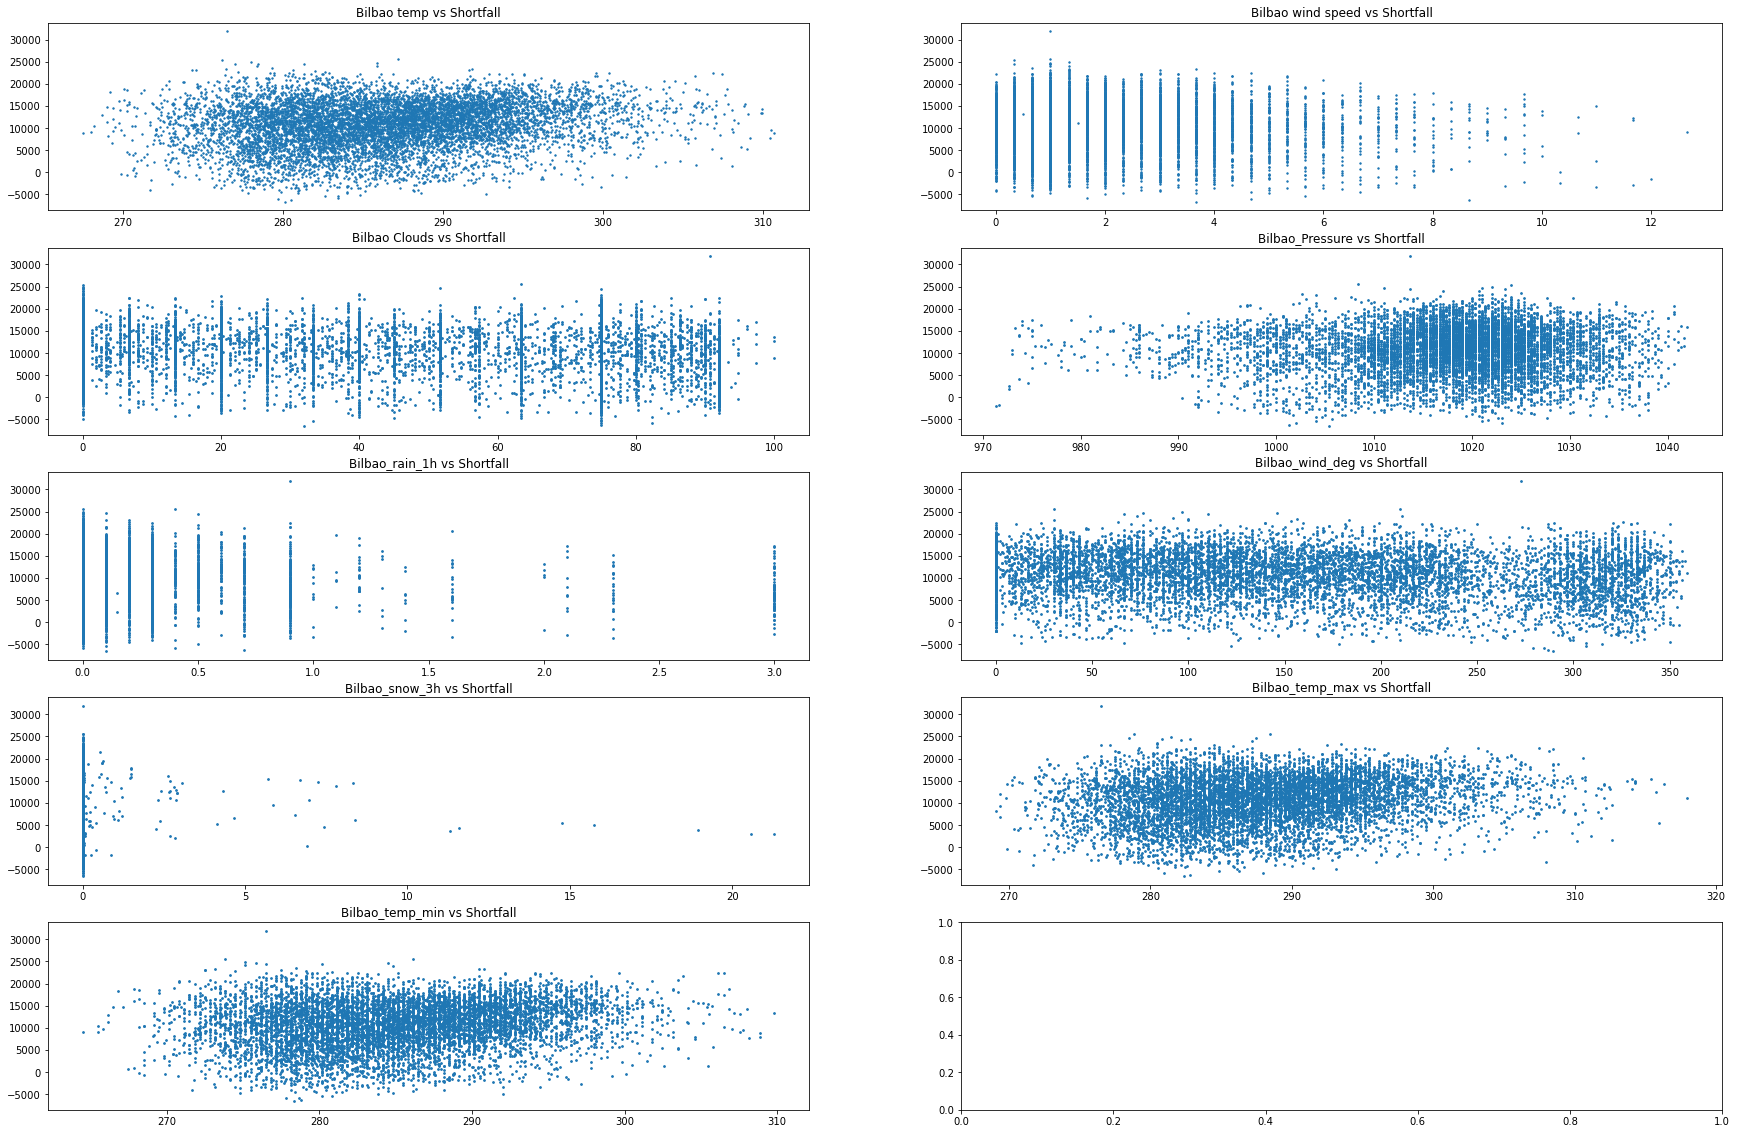

In [ ]:
y = df['load_shortfall_3h']
fig , axes = plt.subplots(5,2,figsize=(30,20))
axes[0,0].scatter(df['Bilbao_temp'], y,s=2)
axes[0,0].set_title('Bilbao temp vs Shortfall')
axes[0,1].scatter(df['Bilbao_wind_speed'],y,s=2)
axes[0,1].set_title('Bilbao wind speed vs Shortfall')
axes[1,0].scatter(df['Bilbao_clouds_all'],y,s=3)
axes[1,0].set_title('Bilbao Clouds vs Shortfall')
axes[1,1].scatter(df['Bilbao_pressure'],y,s=3)
axes[1,1].set_title('Bilbao_Pressure vs Shortfall')
axes[2,0].scatter(df['Bilbao_rain_1h'],y,s=3)
axes[2,0].set_title('Bilbao_rain_1h vs Shortfall')
axes[2,1].scatter(df['Bilbao_wind_deg'],y,s=3)
axes[2,1].set_title('Bilbao_wind_deg vs Shortfall')
axes[3,0].scatter(df['Bilbao_snow_3h'],y,s=3)
axes[3,0].set_title('Bilbao_snow_3h vs Shortfall')
axes[3,1].scatter(df['Bilbao_temp_max'],y,s=3)
axes[3,1].set_title('Bilbao_temp_max vs Shortfall')
axes[4,0].scatter(df['Bilbao_temp_min'],y,s=3)
axes[4,0].set_title('Bilbao_temp_min vs Shortfall')

plt.show()

**Gathered Insights**

Wind Speed : The lack of load_shortfalls with increasing windspeed tends to indicate that high wind_speeds = less shortfall. However, the cities seem to have very low wind_speeds on average.

Rainful : The data indicates that there is very little rainful in these cities. Hence, an extremely weak correlation to load_shortfall.

Tempreture : There does seem to be a trend of less shortfalls with increaseing temperatures.

Humidity and Cloud : There doesn't seem to be a strong relationship between these two varaiables to the load shortfall.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, we will clean the data and create new features which will aid in preparing the data for modeling.|

---

# Cleaning The Data for both Training and Testing sets
- We filled missing values of valencia pressure with the median
- We converted and normalised the Data for Valencia_wind_deg and Seville_pressure
- We converted time to its proper datetime format

In [ ]:
#cleaning the training Data
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].median())
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(float)
df['Seville_pressure'] = df['Seville_pressure'].astype(float)
df['time'] = pd.to_datetime(df['time'])


In [ ]:
#Cleaning the Test Data
test_df['Valencia_pressure'] = test_df['Valencia_pressure'].fillna(test_df['Valencia_pressure'].median())
test_df['Valencia_wind_deg'] = test_df['Valencia_wind_deg'].str.extract('(\d+)')
test_df['Seville_pressure'] = test_df['Seville_pressure'].str.extract('(\d+)')
test_df['Valencia_wind_deg'] = test_df['Valencia_wind_deg'].astype(float)
test_df['Seville_pressure'] = test_df['Seville_pressure'].astype(float)
test_df['time']= pd.to_datetime(test_df['time'])

# Plotting a Time Series
- Now that date is in the correct format we can have a look at the time series plot for the Data.

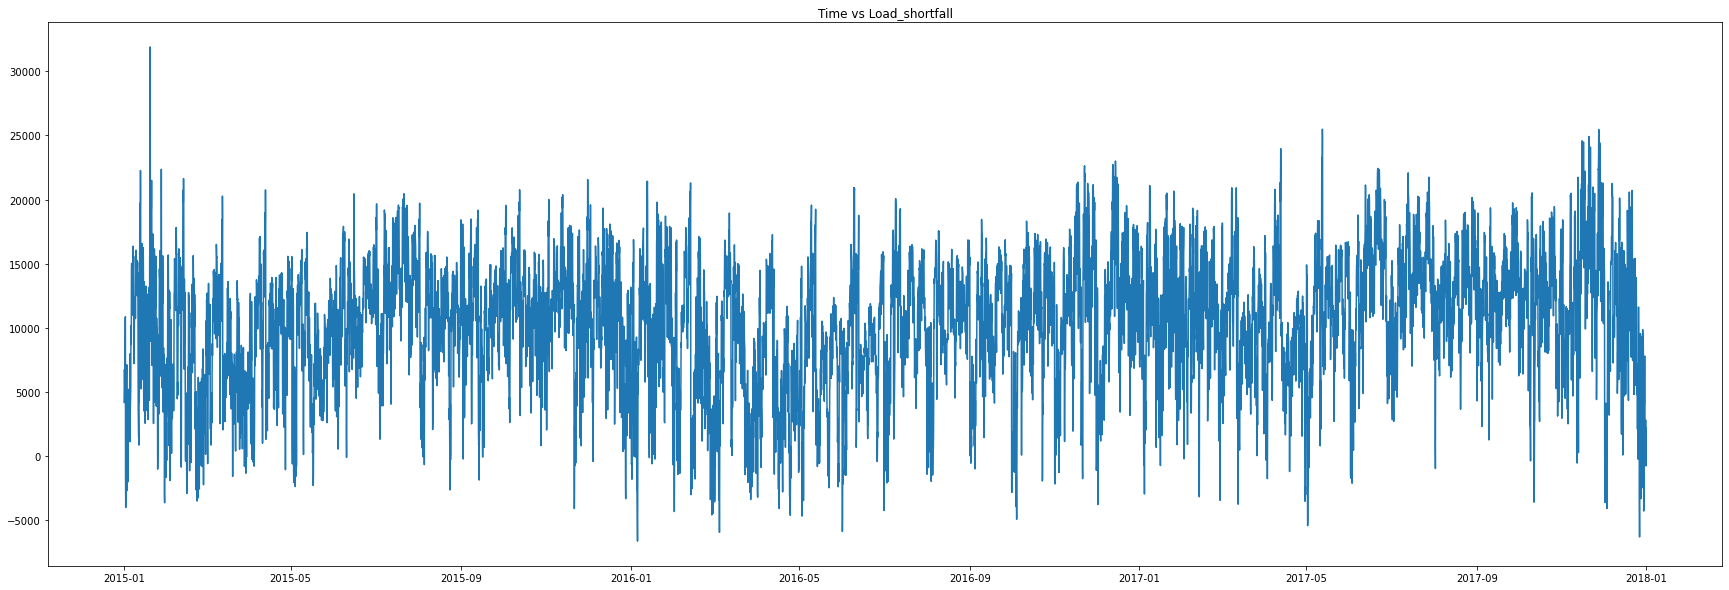

In [ ]:
ig, ax = plt.subplots(figsize=(30,10))
sns.lineplot(x=df['time'].values, y=df['load_shortfall_3h'].values)
plt.title('Time vs Load_shortfall')
plt.show()

# Gathered Insights
- Time and day seem to be a big indicator of the load_shortfall so we will engineer new features to be used in our model.    
- This graph also shows the High nature of the variance in the Dataset.

# New Features
- We created two new features called "time of day" and "day" which represent the the time of the day and the day of the week

In [ ]:
#Create New Feature based on time of day and day of week train df
df['time_of_day'] = df['time'].dt.hour
df['Day'] = df['time'].dt.day

In [ ]:
#Create New Feature based on time of day and day of week for test df
test_df['time_of_day'] = test_df['time'].dt.hour
test_df['Day'] = test_df['time'].dt.day

# Plotting New Feaures to veiw Relationships


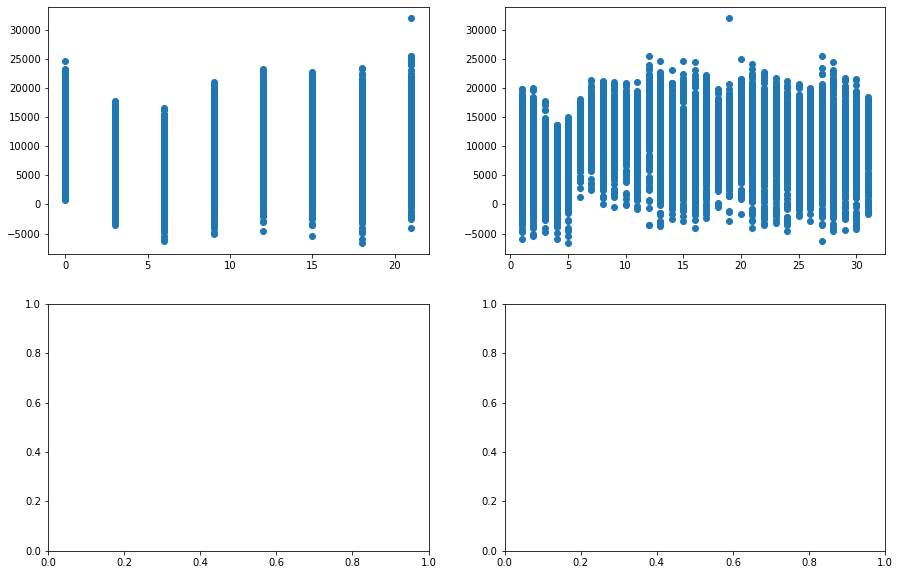

In [ ]:
fig , axes = plt.subplots(2,2,figsize=(15,10))
axes[0,0].scatter(df['time_of_day'],y)
axes[0,1].scatter(df['Day'],y)
plt.show()

# Gathered Insights
- Time of Day : Has a very clear relationship of increasing from 06H00 a.m till its peak around 21H00 and there after decreasing again till its minimum value at 06H00 again. After a bit of research we know that the coldest part of the day is just before sunrise, so perhaps the major contributer to Green Energy is Solar or Thermal in nature
- Day - We see a very clear spike in load_shortfall after the first five days of the month, this could indicate that perhaps Spain imports a portion of their power and the budget is used very quickly.

# Relevant Features
- We will use all the independent features except temperature averages to create our model, The reason for excluding
temperature averages is due to multicollinearity with the other temperature features(min/max) in the dataframe.

In [ ]:
drop_list2 = ['Madrid_temp','Seville_temp', 'Bilbao_temp',
            'Barcelona_temp','Valencia_temp', 'time']
nw_df = df.copy()
nw_df = nw_df.drop(columns=[col for col in nw_df if col in drop_list2])

#Correlation table ,heatmap and scatter plots are some of the additional descriptive statistics i used